In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
x=x.to_numpy()
y=y.to_numpy()

In [5]:
x_train=x[:49000]
x_test=x[49000:]

In [6]:
y_train=y[:49000]
y_test=y[49000:]

In [13]:
idx_6=np.where(y_train=='6')
x_train_6=x_train[idx_6]
y_train_6=np.ones(len(x_train_6))

In [15]:
idx_9=np.where(y_train=='9')
x_train_9=x_train[idx_9]
y_train_9=np.zeros(len(x_train_9))

In [16]:
x_train_69=np.concatenate((x_train_6,x_train_9))

In [17]:
y_train_69=np.concatenate((y_train_6,y_train_9))

In [18]:
from sklearn.utils import shuffle
x_train_69,y_train_69=shuffle(x_train_69,y_train_69,random_state=1729)

In [19]:
idx_test_6=np.where(y_test=='6')
x_test_6=x_test[idx_test_6]
y_test_6=np.ones(len(x_test_6))

In [20]:
idx_test_9=np.where(y_test=='9')
x_test_9=x_test[idx_test_9]
y_test_9=np.zeros(len(x_test_9))

In [26]:
x_test_69=np.concatenate((x_test_6,x_test_9))
y_test_69=np.concatenate((y_test_6,y_test_9))

In [27]:
x_test_69,y_test_69=shuffle(x_test_69,y_test_69,random_state=1729)

In [28]:
from sklearn.linear_model import SGDClassifier

In [33]:
sgd_a=SGDClassifier(penalty=None,random_state=10,warm_start=True,learning_rate='constant',eta0=0.01,loss='log_loss',max_iter=1)

In [30]:
from sklearn.metrics import log_loss

In [34]:
loss_a=[]
iteration=30
for i in range(iteration):
  sgd_a.fit(x_train_69,y_train_69)
  y_pred=sgd_a.predict_proba(x_train_69)
  loss_a.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

In [35]:
loss_a

[0.07026774208836734,
 0.036983022151772384,
 0.11464736867049394,
 0.07396604430354455,
 0.0628711376580129,
 0.014793208860709088,
 0.08136264873389898,
 0.10355246202496228,
 0.007396604430354655,
 0.003698302215177439,
 0.03328471993659517,
 0.011094906645531871,
 0.011094906645531871,
 0.036911900955326676,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16,
 2.2204460492503136e-16]

In [39]:
iter=[]
for i in range(iteration):
  iter.append(i+1)

In [41]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Loss')

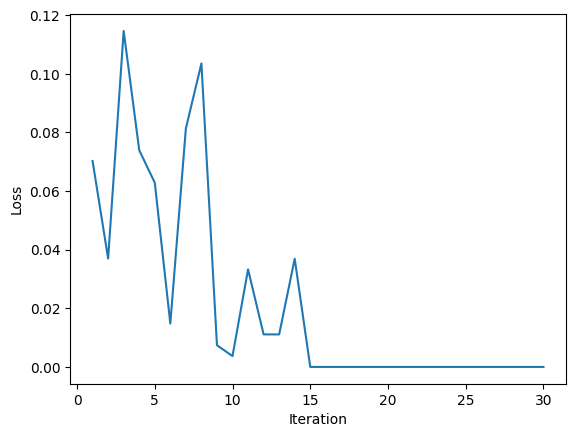

In [44]:
plt.plot(iter,loss_a)
plt.xlabel('Iteration')
plt.ylabel('Loss')
##at iteratin 15(iter_no=14) the loss became 0


In [45]:
sgd_b=SGDClassifier(penalty=None,random_state=10,warm_start=True,learning_rate='constant',eta0=0.000001,loss='log_loss',max_iter=1)

In [54]:
loss_b=[]
iteration=30
for i in range(iteration):
  sgd_b.fit(x_train_69,y_train_69)
  y_pred=sgd_a.predict_proba(x_train_69)
  loss_b.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Text(0, 0.5, 'Loss')

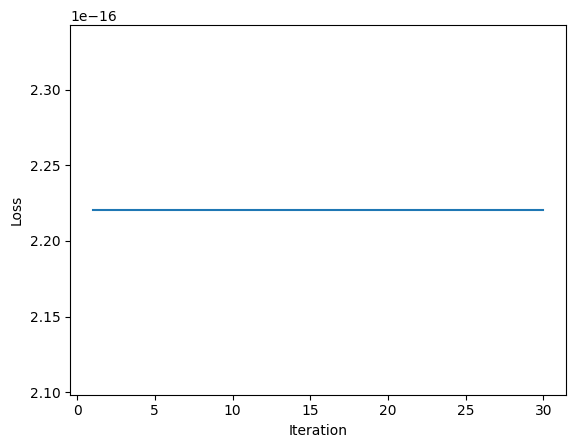

In [47]:
plt.plot(iter,loss_b)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [48]:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [49]:
x_train_69_scaled=ss.fit_transform(x_train_69)

In [56]:
loss_c=[]
iteration=30
for i in range(iteration):
  sgd_a.fit(x_train_69_scaled,y_train_69)
  y_pred=sgd_a.predict_proba(x_train_69_scaled)
  loss_c.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Text(0, 0.5, 'Loss')

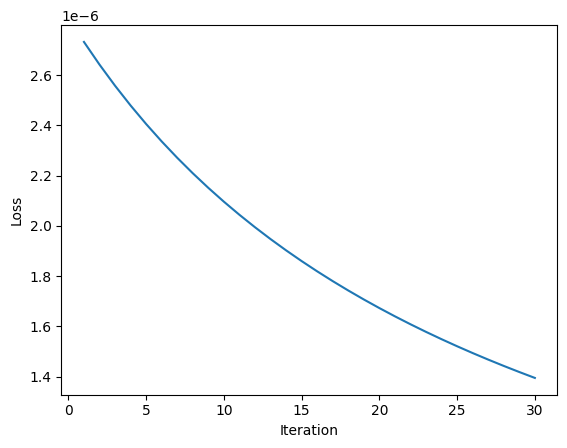

In [57]:
plt.plot(iter,loss_c)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [62]:
sgd_d=SGDClassifier(penalty=None,random_state=10,warm_start=True,learning_rate='invscaling',eta0=1,power_t=1,loss='log_loss',max_iter=1)

In [63]:
loss_d=[]
iteration=30
for i in range(iteration):
  sgd_d.fit(x_train_69,y_train_69)
  y_pred=sgd_d.predict_proba(x_train_69)
  loss_d.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Text(0, 0.5, 'Loss')

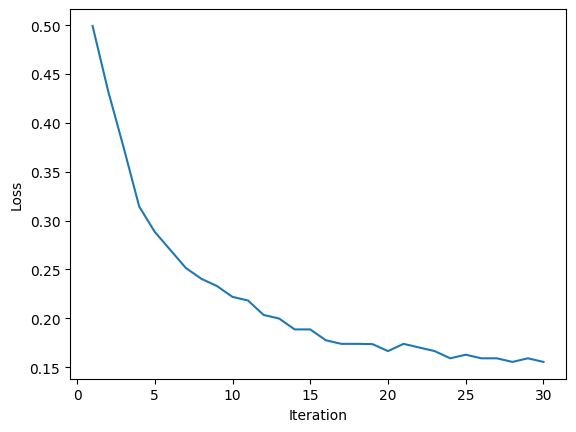

In [64]:
plt.plot(iter,loss_d)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [74]:
sgd=SGDClassifier(penalty=None,eta0=0.5,learning_rate='invscaling',power_t=0.5,shuffle=True,random_state=10,max_iter=10,loss='log_loss')

In [75]:
sgd.fit(x_train_69,y_train_69)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(eta0=0.5, learning_rate='invscaling', loss='log_loss',
              max_iter=10, penalty=None, random_state=10)

In [76]:
y_pred=sgd.predict(x_train_69)

In [77]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_train_69,y_pred)

In [80]:
false_positive=cn[0][1]
false_positive

7

In [90]:
false_positive_index=np.where((y_train_69=='0') & (y_pred=='1'))

<ipython-input-90-12c5174f260d>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  false_positive_index=np.where((y_train_69=='0') & (y_pred=='1'))[0]


In [91]:
false_positive_index

array([], dtype=int64)

In [86]:
import numpy as np

# Assuming x_train_69 and y_train_69 are the training data and labels
# Assuming the model and y_pred_train are already defined and trained

# Get the indices of False Positive samples
false_positive_indices = np.where((y_train_69 == 0) & (y_pred == 1))[0]

# Display the False Positive samples
for index in false_positive_indices:
    print("Sample at index", index)
    # Display the sample here, you may need to modify this based on your data format
    # For example, if your data is an image dataset, you can plot the image at this index
    # If your data is a tabular dataset, you can print the features of the sample at this index

# Get the first index of False Positive sample in ascending order
first_index_fp = false_positive_indices[0]

print("First index of False Positive sample:", first_index_fp)


Sample at index 2167
Sample at index 2407
Sample at index 3036
Sample at index 3368
Sample at index 4217
Sample at index 5556
Sample at index 6230
First index of False Positive sample: 2167


In [114]:
from sklearn.datasets import fetch_20newsgroups
x_20,y_20=fetch_20newsgroups(return_X_y=True)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
tfid=TfidfVectorizer()

In [117]:
x_20_tfid=tfid.fit_transform(x_20)

In [118]:
x_20_tfid.shape

(11314, 130107)

In [121]:
from sklearn.model_selection import train_test_split

In [130]:
x_20_train,x_20_test,y_20_train,y_20_test=train_test_split(x_20_tfid,y_20,test_size=0.3,random_state=0)

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
mnb=MultinomialNB()

In [131]:
mnb.fit(x_20_train,y_20_train)

MultinomialNB()

In [133]:
y_20_pred=mnb.predict(x_20_test)

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
accuracy_score(y_20_test,y_20_pred)

0.8427098674521355